<a href="https://colab.research.google.com/github/christine99x/MasterCourseProject/blob/main/SNA/SNA_A1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. The number of directed links m
2. The number of nodes n

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('large.tsv', sep='\t', header=None)
data = data.dropna()
data = data.drop_duplicates()
data = data[data[0]!=data[1]]
G = nx.DiGraph()
print(data.shape[0])
for i in range(data.shape[0]):
  G.add_nodes_from([data.iat[i,0], data.iat[i,1]])
  if data.iat[i,0] != data.iat[i,1]:
    G.add_edge(data.iat[i,0], data.iat[i,1])
  else:
    data.drop(index=i)
print("m =",G.number_of_edges())
print("n =", G.number_of_nodes())

237090
m = 237090
n = 26885


3. Distribution of indegree and outdegree

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


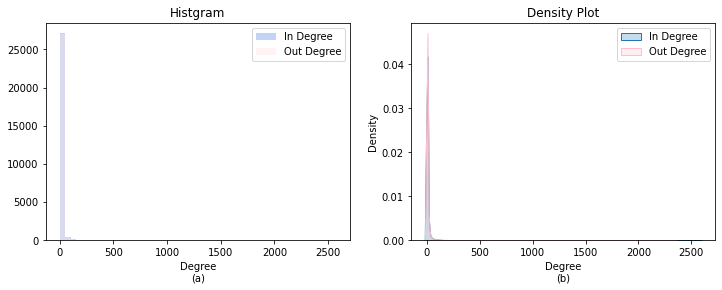

In [ ]:
indeg = []
outdeg = []
for i in G.in_degree:
  indeg.append(i[1])
for j in G.out_degree:
  outdeg.append(j[1])
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(indeg, label='In Degree', color='cornflowerblue', kde=False)
sns.distplot(outdeg, label='Out Degree', color='mistyrose', kde=False)
plt.legend()
plt.xlabel("Degree\n(a)")
plt.title("Histgram")
plt.subplot(122)
sns.kdeplot(indeg, label='In Degree', shade=True)
sns.kdeplot(outdeg, label='Out Degree', color='pink', shade=True)
plt.legend()
plt.xlabel("Degree\n(b)")
plt.title("Density Plot")
plt.show()

4. Number of strongly connected components and weakly connected components & Number of nodes and links in the largest strongly/weakly connected component

In [ ]:
print("Number of strongly connected components is", nx.number_strongly_connected_components(G))
print("Number of weakly connected components is", nx.number_weakly_connected_components(G))

Number of strongly connected components is 2606
Number of weakly connected components is 705


In [ ]:
strong_len = 0
weak_len = 0
for i in nx.strongly_connected_components(G):
  if len(i) > strong_len:
    strong_len = len(i)
    strong = i
for j in nx.weakly_connected_components(G):
  if len(j) > weak_len:
    weak_len = len(j)
    weak = list(j)
W = G.subgraph(weak).copy()
S = G.subgraph(strong)
print(S.number_of_edges())
print(strong_len)
print(W.number_of_edges())
print(weak_len)

226492
18531
235186
24567


5. Average clustering coefficient

In [ ]:
nx.average_clustering(G)

0.15661125055481695

6. Distribution of the largest weakly connected component

In [ ]:
path = dict(nx.all_pairs_shortest_path_length(W))

In [ ]:
distances = []
for i in path:
  for j in list(path[i].values()):
    distances.append(j)
sns.histplot(distances)
plt.xlabel('Distances')

7. Visualize the network in medium.tsv

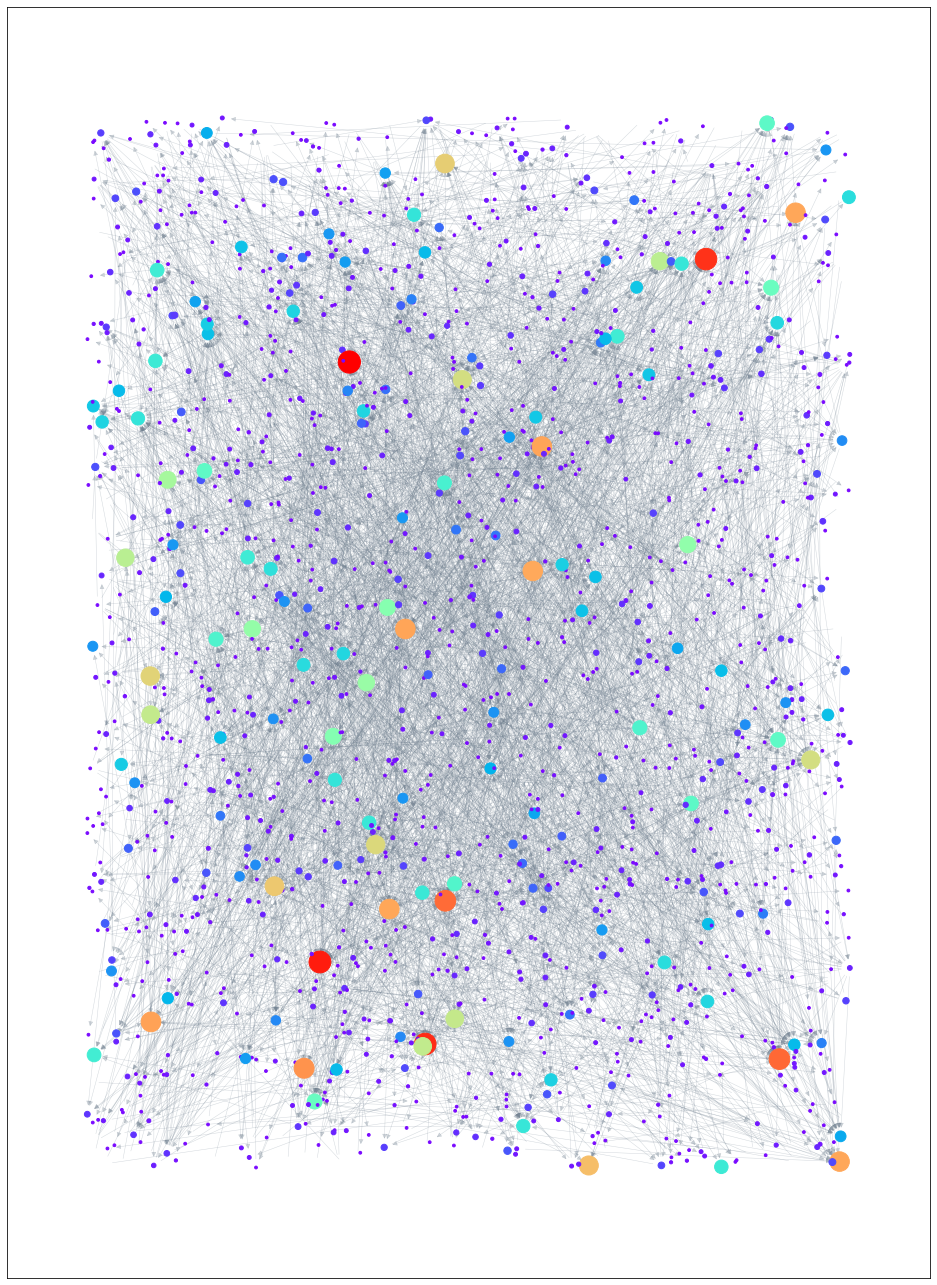

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(16.54,23.38))
c = list(nx.closeness_centrality(G).values())
p = nx.random_layout(G)
s = list(map(lambda x: x*20000, c))
nx.draw_networkx_nodes(G, pos=p, node_size=s, node_color=s, vmin=0, vmax=494, cmap = plt.cm.get_cmap('rainbow'))
nx.draw_networkx_edges(G, width=0.5, pos=p, alpha=0.3, edge_color='slategrey')
plt.show()
plt.savefig("medium.png")